In [ ]:
SDB = sqlite3.connect('Testas.db') # jei neegsiztuoja - bus sukurfta nauja sqlite DB
Cs = SDB.cursor()

sql = '''create table if not exists T1
(
name text not null,
surname text not null,
age integer not null,
salary real not null
)
'''
Cs.execute(sql)

sql_template = '''insert into T1 values (?,?,?,?)'''
data = [("Ona", "Onynė", 24, 1860),("Jonas", "Jonėnas", 28, 1670),("Petras", "Petrynas", 42, 2760)]
Cs.executemany(sql_template, data)

Cs.execute(sql_template, ('T1','F1', 10, 1024))

SDB.commit() # commit() būtinas, jei norite įrašyti duoenis į DB

SDB.close()

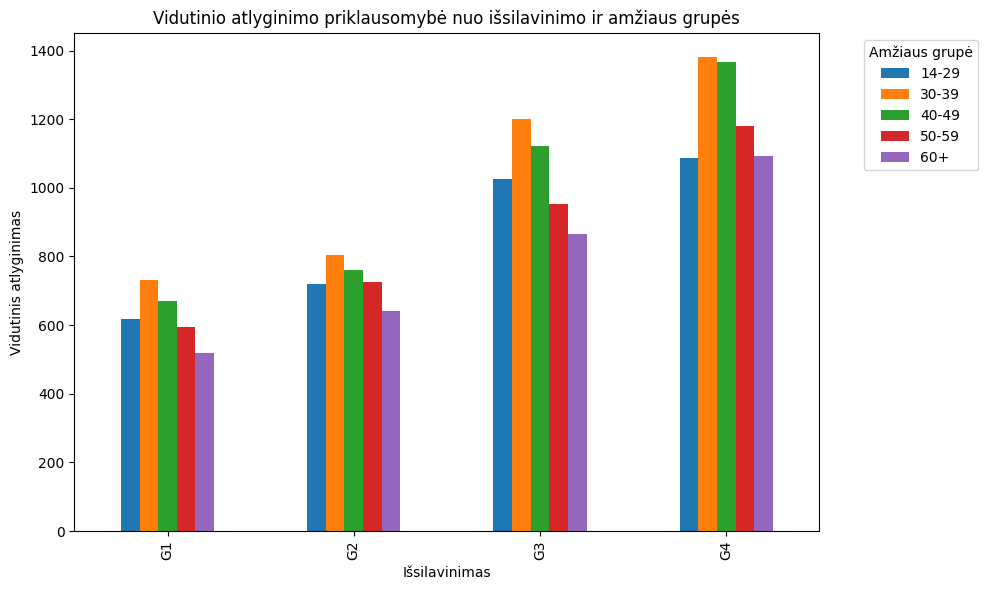

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Vietoj SQL užklausos, nuskaitome CSV failą
salary = pd.read_csv('../../DATA/DUS2018.csv')


# Grupavimas pagal išsilavinimą ir amžiaus grupę, vidutinio atlyginimo skaičiavimas
salary_grouped = salary.groupby(['issilavinimas', 'amzius'])['bdu_spalio'].mean().unstack().plot(kind='bar', figsize=(10, 6))

# Grafiko pritaikymas
plt.title('Vidutinio atlyginimo priklausomybė nuo išsilavinimo ir amžiaus grupės')
plt.xlabel('Išsilavinimas')
plt.ylabel('Vidutinis atlyginimas')
plt.legend(title='Amžiaus grupė', bbox_to_anchor=(1.05, 1), loc='upper left')

# Parodome grafiką
plt.tight_layout()
plt.show()